Langkah pertama yaitu menimpor seluruh modul yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima import auto_arima

In [ ]:
Selanjutnya mengimpor data yang diperlukan melalui tautan pada ppt tugas

In [2]:
df_Customer = pd.read_csv (r"C:\Users\USER\Documents\course\Data Science\KALBE (Virtual Internship)\Minggu 4\Case Study - Customer.csv", delimiter = ";")
df_Product = pd.read_csv (r"C:\Users\USER\Documents\course\Data Science\KALBE (Virtual Internship)\Minggu 4\Case Study - Product.csv", delimiter = ";")
df_Store = pd.read_csv (r"C:\Users\USER\Documents\course\Data Science\KALBE (Virtual Internship)\Minggu 4\Case Study - Store.csv", delimiter = ";")
df_Transaction = pd.read_csv (r"C:\Users\USER\Documents\course\Data Science\KALBE (Virtual Internship)\Minggu 4\Case Study - Transaction.csv", delimiter = ";")

Memeastikan apakah data sudah terimpor

In [3]:
df_Customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_Product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
df_Store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
df_Transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


Menggabungkan seluruh data menjadi satu data kesatuan

In [7]:
df_merge = pd.merge (df_Customer, df_Transaction, on =['CustomerID'])
df_merge = pd.merge (df_merge, df_Product.drop(columns= ['Price']), on=['ProductID'])
df_merge = pd.merge (df_merge, df_Store, on=['StoreID'])

Memeriksa data yang sudah disatukan

In [8]:
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,"5,12",TR54475,23/02/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
1,5,58,1,Married,"3,57",TR53643,22/05/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
2,7,31,0,Married,"4,57",TR5151,10/03/2022,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
3,19,24,1,Single,"4,14",TR98635,18/06/2022,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
4,28,55,0,Married,"6,08",TR9420,12/01/2022,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"


Memeriksa setiap tipe data, apakah sudah sesuai

In [9]:
df_merge.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
TransactionID     object
Date              object
ProductID         object
Price              int64
Qty                int64
TotalAmount        int64
StoreID            int64
Product Name      object
StoreName         object
GroupStore        object
Type              object
Latitude          object
Longitude         object
dtype: object

Melakukan perubahan beberapa tipe data

In [10]:
df_merge['Income'] = df_merge['Income'].replace('[,]', '.', regex=True).astype ('float')
df_merge['Latitude'] = df_merge['Latitude'].replace('[,]', '.', regex=True).astype('float')
df_merge['Longitude'] = df_merge['Longitude'].replace('[,]', '.', regex=True).astype('float')
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

C:\Users\USER\AppData\Local\Temp\ipykernel_8444\2105090668.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_merge['Date'] = pd.to_datetime(df_merge['Date'])


Memastikan kembali apakah tipe data sudah berubah

In [11]:
df_merge.dtypes

CustomerID                 int64
Age                        int64
Gender                     int64
Marital Status            object
Income                   float64
TransactionID             object
Date              datetime64[ns]
ProductID                 object
Price                      int64
Qty                        int64
TotalAmount                int64
StoreID                    int64
Product Name              object
StoreName                 object
GroupStore                object
Type                      object
Latitude                 float64
Longitude                float64
dtype: object

In [12]:
df_merge.shape

(5020, 18)

In [13]:
df_merge.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,1,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,1,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,0,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,1,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,0,Married,6.08,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643


Dalam satu baris kode ini, saya mengelompokkan data berdasarkan tanggal, menghitung jumlah kuantitas harian, dan mengatur ulang indeks DataFrame. Ini adalah cara yang kompak dan efisien untuk mencapai hasil yang sama.

In [14]:
daily_qty = df_merge.groupby('Date')['Qty'].sum().reset_index()
daily_qty

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


df_train: Data pelatihan yang digunakan untuk melatih model sebesar 90%.
df_test: Data pengujian yang digunakan untuk menguji kinerja model.
Data pelatihan digunakan untuk mengembangkan dan melatih model, sedangkan data pengujian digunakan untuk menguji sejauh mana model Anda dapat memprediksi dengan benar. Ini adalah langkah penting dalam pengembangan model machine learning.

In [15]:
Train_size = int(0.9 * len(daily_qty))
df_train = daily_qty [:Train_size]
df_test = daily_qty [Train_size:]

In [16]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
323,2022-11-20,55
324,2022-11-21,55
325,2022-11-22,49
326,2022-11-23,40


In [17]:
df_test

,Date,Qty
328,2022-11-25,55
329,2022-11-26,40
330,2022-11-27,53
331,2022-11-28,50
332,2022-11-29,55
333,2022-11-30,45
334,2022-12-01,35
335,2022-12-02,34
336,2022-12-03,41
337,2022-12-04,98


Kode ini digunakan untuk membuat plot garis (line plot) yang memvisualisasikan data pelatihan (df_train) dan data pengujian (df_test) dalam hal kuantitas harian (Qty) terhadap tanggal (Date). 

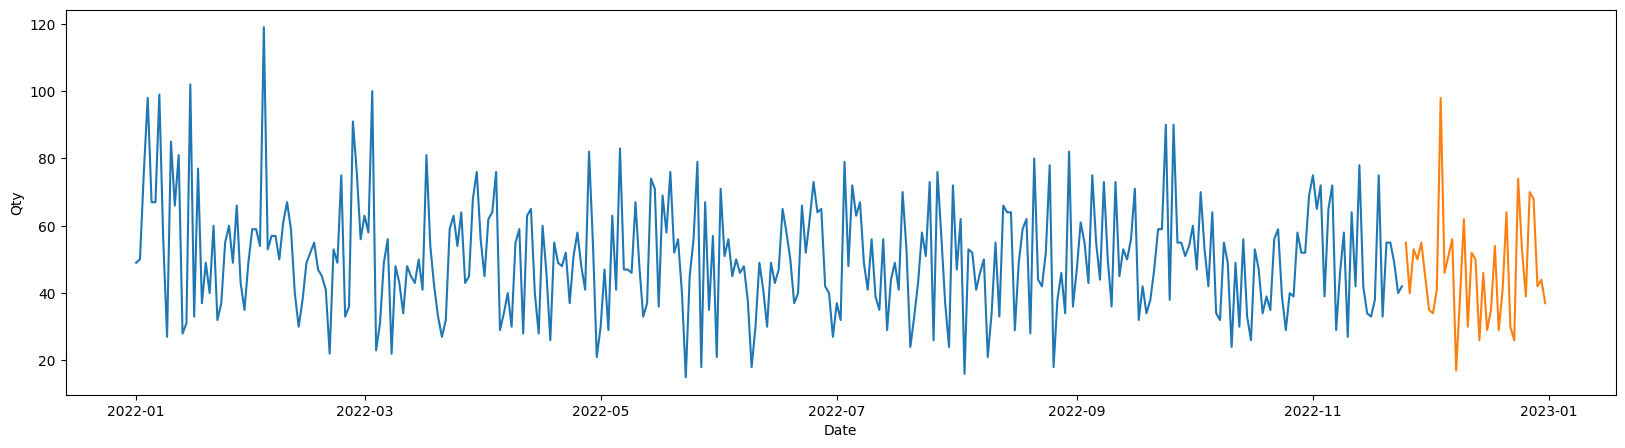

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train["Date"], y=df_train["Qty"]);
sns.lineplot(data=df_test, x=df_test["Date"], y=df_test["Qty"]);

Kode ini digunakan untuk mengatur indeks DataFrame df_train dan df_test menjadi kolom 'Date'. Kemudian, kolom 'Qty' dari df_train disimpan dalam variabel y.

In [19]:
df_train = df_train.set_index ('Date')
df_test = df_test.set_index ('Date')

y = df_train['Qty']

Pada 5 kode selanjutnya adalah langkah yang saya lakukan untuk memvalidasi nilai 'd' pada model arima dan mendapatkan informasi bahwa data sudah stationer sehingga nilai 'd' = 0

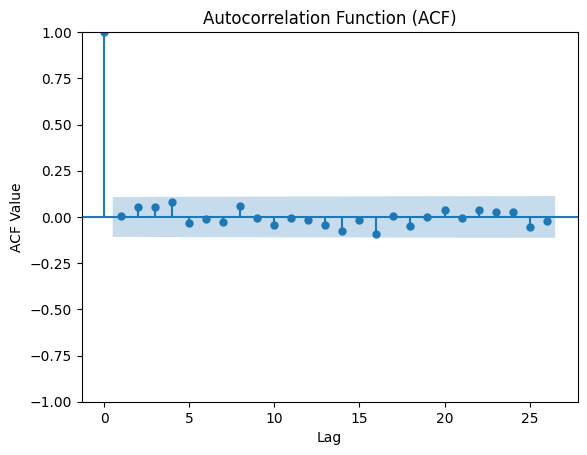

In [20]:
plot_acf(df_train['Qty'])  
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')
plt.show()

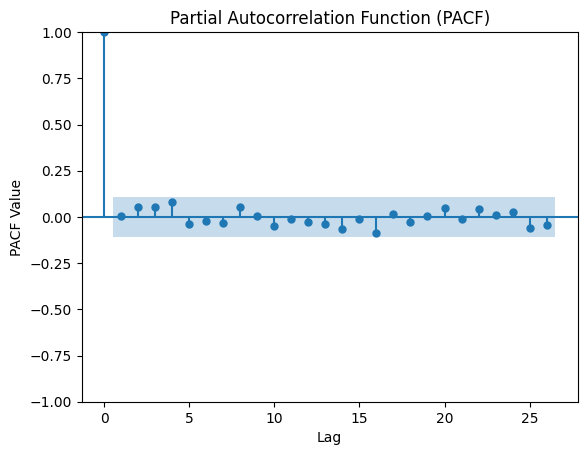

In [21]:
plot_pacf(df_train['Qty'])  
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF Value')
plt.show()

In [22]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')

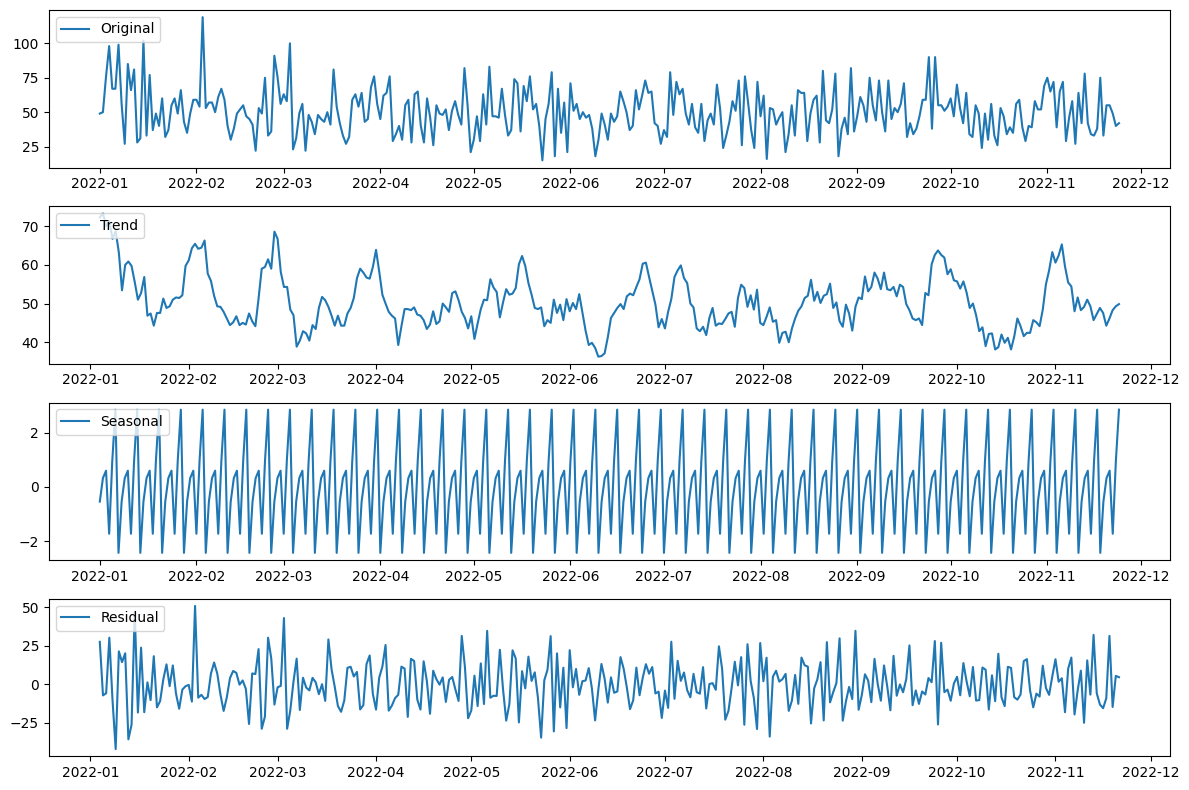

In [23]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(y, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [24]:
adtest = adfuller(y)
adtest[1]

2.779206321430101e-30

Kode ini adalah langkah-langkah awal dalam penggunaan model ARIMA (Autoregressive Integrated Moving Average) untuk menganalisis dan memodelkan data time series.

In [25]:
ArimaModel = ARIMA(y, order=(10, 0, 9))
ArimaFit = ArimaModel.fit()

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Kode ini digunakan untuk membuat prediksi menggunakan model ARIMA yang telah dilatih sebelumnya (ArimaFit) untuk jumlah langkah yang ditentukan.

In [26]:
ypred_steps = len(df_test)
ypred = ArimaFit.forecast(steps=ypred_steps)

Kode ini digunakan untuk membuat plot visual yang membandingkan data pelatihan, data pengujian, dan hasil prediksi dari model ARIMA.

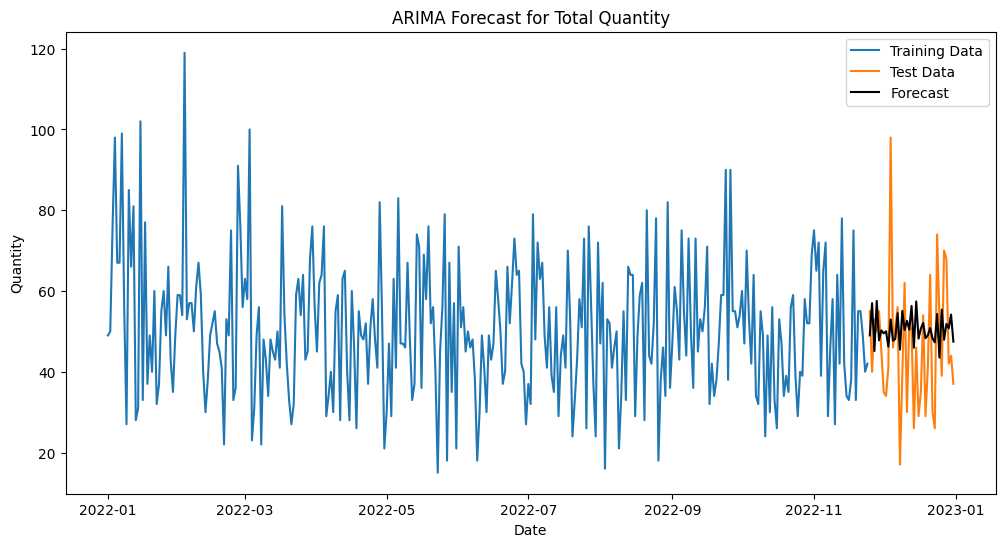

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Training Data')
plt.plot(df_test.index, df_test['Qty'], label='Test Data')
plt.plot(df_test.index, ypred, label='Forecast', color='black')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('ARIMA Forecast for Total Quantity')
plt.legend()
plt.show()

Kode ini digunakan untuk menghitung dan mencetak nilai Root Mean Squared Error (RMSE) dan Mean Absolute Error (MAE) antara data pengujian (df_test) dan hasil prediksi (ypred) dari model ARIMA Anda

In [28]:
rmse = np.sqrt(mean_squared_error(df_test, ypred))
print(f"RMSE: {rmse}")
mae = mean_absolute_error(df_test, ypred)
print(f"MAE: {mae}")

RMSE: 15.724655813087114
MAE: 13.131254467478701


Kode ini digunakan untuk mengelompokkan data dalam df_merge berdasarkan kolom 'CustomerID' dan mengagregasi beberapa metrik seperti 'TransactionID', 'Qty', dan 'TotalAmount' untuk masing-masing grup pelanggan

In [29]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum'
}).reset_index()
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


Menghapus kolom 'CustomerID' karena tidak diperlukan

In [30]:
data_cluster=df_cluster.drop(columns='CustomerID')
data_cluster

,TransactionID,Qty,TotalAmount
0,17,60,623300
1,13,57,392300
2,15,56,446200
3,10,46,302500
4,7,27,268600
...,...,...,...
442,16,59,485100
443,18,62,577700
444,18,68,587200
445,11,42,423300


Kode ini digunakan untuk melakukan normalisasi data dalam df_cluster. Normalisasi adalah proses mengubah data sehingga memiliki skala yang sama, yaitu dalam rentang antara 0 hingga 1. Ini sering digunakan dalam analisis data ketika fitur-fitur memiliki skala yang berbeda atau ketika algoritma machine learning yang akan digunakan memerlukan data yang telah dinormalisasi

In [31]:
df_cluster_normalize = preprocessing.normalize(data_cluster)
df_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

Kode ini digunakan untuk melakukan clustering menggunakan algoritma K-Means dengan berbagai jumlah klaster (K) yang berbeda dan menghitung skor siluet untuk setiap konfigurasi. Hasil dari loop ini adalah daftar model K-Means yang telah dilatih untuk berbagai nilai K dan skor siluet yang sesuai dengan setiap model. 

In [32]:
K = range(2, 8)
fits = []
score = []
for k in K:
    model = KMeans(n_clusters = k, random_state = 0 , n_init='auto').fit(df_cluster_normalize)
    
    fits.append(model)
    
    score.append(silhouette_score(df_cluster_normalize, model.labels_, metric='euclidean'))

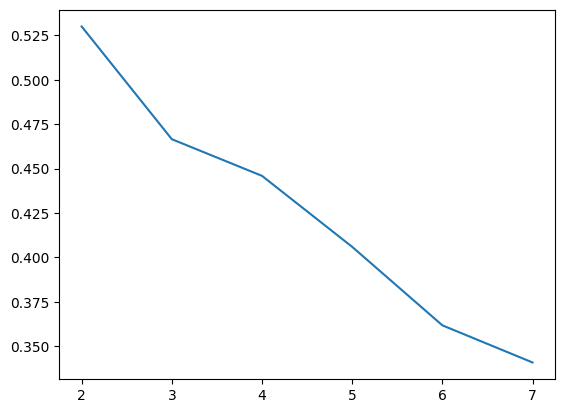

In [33]:
sns.lineplot(x = K, y=score);

Kode ini digunakan untuk menambahkan kolom baru bernama 'cluster_label' ke dalam DataFrame df_cluster dengan menggunakan label klaster dari model K-Means yang disimpan dalam fits[2]

In [34]:
df_cluster['cluster_label'] = fits[2].labels_

Kode ini mencoba untuk mengelompokkan DataFrame df_cluster berdasarkan kolom 'cluster_label' yang telah ditambahkan sebelumnya, dan kemudian menghitung beberapa statistik agregat untuk setiap klaster. 

In [35]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID': [('Count', 'count')],
    'TransactionID': [('Mean', 'mean')],
    'Qty': [('Mean', 'mean')],
    'TotalAmount': [('Mean', 'mean')]
})

,CustomerID,TransactionID,Qty,TotalAmount
,Count,Mean,Mean,Mean
cluster_label,,,,
0,164,10.969512,41.146341,345989.024390
1,90,10.866667,40.766667,292478.888889
2,189,11.714286,41.063492,414694.708995
3,4,7.250000,29.500000,150100.000000
